# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url =  url + "appid=" + weather_api_key + + "&q=" + city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | tilichiki
Processing Record 6 of Set 1 | pemberton
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | salalah
Processing Record 11 of Set 1 | bourail
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 1 | rorvik
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | macamic
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | longyearbyen
Processi

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,26.84,78,19,6.75,PF,1680378071
1,avarua,-21.2078,-159.7750,28.03,78,75,2.06,CK,1680378072
2,hermanus,-34.4187,19.2345,17.11,83,0,3.96,ZA,1680378072
3,tilichiki,60.4667,166.1000,-10.54,97,87,1.63,RU,1680378072
4,pemberton,50.3164,-122.8027,3.83,65,100,2.44,CA,1680378072


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/helenamabey/Git files/python-api-challenge/WeatherPy/output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("/Users/helenamabey/Git files/python-api-challenge/WeatherPy/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,26.84,78,19,6.75,PF,1680378071
1,avarua,-21.2078,-159.7750,28.03,78,75,2.06,CK,1680378072
2,hermanus,-34.4187,19.2345,17.11,83,0,3.96,ZA,1680378072
3,tilichiki,60.4667,166.1000,-10.54,97,87,1.63,RU,1680378072
4,pemberton,50.3164,-122.8027,3.83,65,100,2.44,CA,1680378072


In [33]:
city_data_df = city_data_df.astype({"Date":"datetime64[s]"})
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,26.84,78,19,6.75,PF,2023-04-01 19:41:11
1,avarua,-21.2078,-159.7750,28.03,78,75,2.06,CK,2023-04-01 19:41:12
2,hermanus,-34.4187,19.2345,17.11,83,0,3.96,ZA,2023-04-01 19:41:12
3,tilichiki,60.4667,166.1000,-10.54,97,87,1.63,RU,2023-04-01 19:41:12
4,pemberton,50.3164,-122.8027,3.83,65,100,2.44,CA,2023-04-01 19:41:12


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

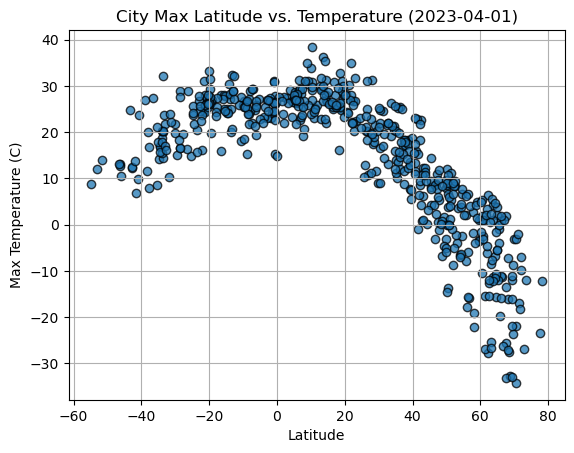

In [34]:
# Build scatter plot for latitude vs. temperature
Fig1 = plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black',alpha=0.75)

# Incorporate the other graph properties
plt.grid()
plt.title('City Max Latitude vs. Temperature (2023-04-01)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("/Users/helenamabey/Git files/python-api-challenge/WeatherPy/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

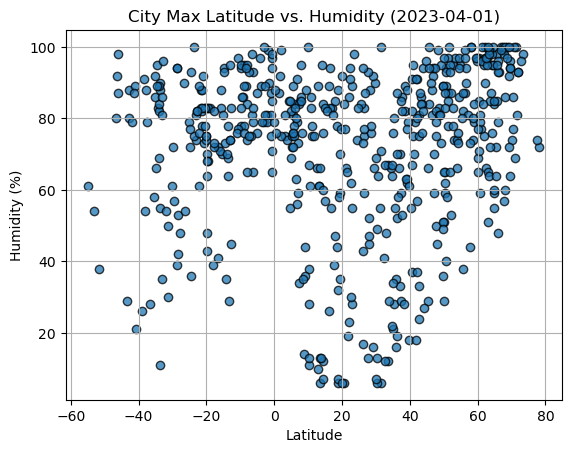

In [36]:
# Build scatter plot for latitude vs. humidity
Fig2 = plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black',alpha=0.75)

# Incorporate the other graph properties
plt.grid()
plt.title('City Max Latitude vs. Humidity (2023-04-01)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("/Users/helenamabey/Git files/python-api-challenge/WeatherPy/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

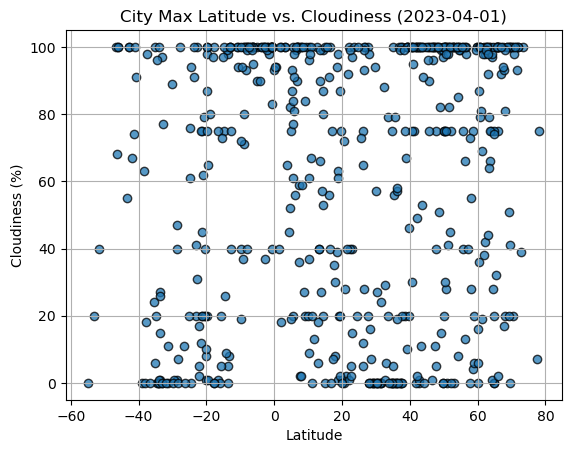

In [38]:
# Build scatter plot for latitude vs. cloudiness
Fig3 = plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black',alpha=0.75)

# Incorporate the other graph properties
plt.grid()
plt.title('City Max Latitude vs. Cloudiness (2023-04-01)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("/Users/helenamabey/Git files/python-api-challenge/WeatherPy/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

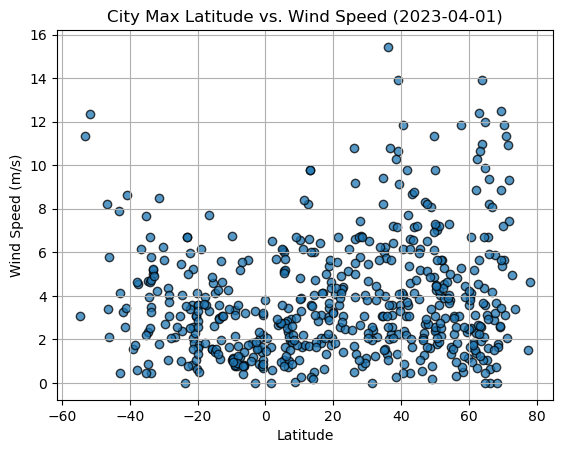

In [40]:
# Build the scatter plots for latitude vs. wind speed
Fig4 = plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black',alpha=0.75)

# Incorporate the other graph properties
plt.grid()
plt.title('City Max Latitude vs. Wind Speed (2023-04-01)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("/Users/helenamabey/Git files/python-api-challenge/WeatherPy/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [208]:
# Define a function to create Linear Regression plots
def lin_reg(x_in, y_in,an_x,an_y,y_ax):

    x_values = x_in
    y_values = y_in
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_ax)
    correlation = np.corrcoef(x_values, y_values)
    plt.annotate(line_eq, xy=(an_x,an_y), color='red',fontsize=15)
    print('The r-value is: ' + "{:.16f}".format(correlation[0,1]))
    plt.show()


In [209]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,tilichiki,60.4667,166.1000,-10.54,97,87,1.63,RU,2023-04-01 19:41:12
4,pemberton,50.3164,-122.8027,3.83,65,100,2.44,CA,2023-04-01 19:41:12
5,katsuura,35.1333,140.3000,14.01,76,100,6.00,JP,2023-04-01 19:41:13
6,salalah,17.0151,54.0924,28.05,83,75,4.12,OM,2023-04-01 19:41:13
9,rorvik,64.8621,11.2373,2.06,55,20,3.60,NO,2023-04-01 19:41:15


In [210]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,26.84,78,19,6.75,PF,2023-04-01 19:41:11
1,avarua,-21.2078,-159.7750,28.03,78,75,2.06,CK,2023-04-01 19:41:12
2,hermanus,-34.4187,19.2345,17.11,83,0,3.96,ZA,2023-04-01 19:41:12
7,bourail,-21.5667,165.4833,24.47,88,12,0.82,NC,2023-04-01 19:41:14
8,mataura,-46.1927,168.8643,13.04,98,100,2.10,NZ,2023-04-01 19:31:35


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8810744540034099


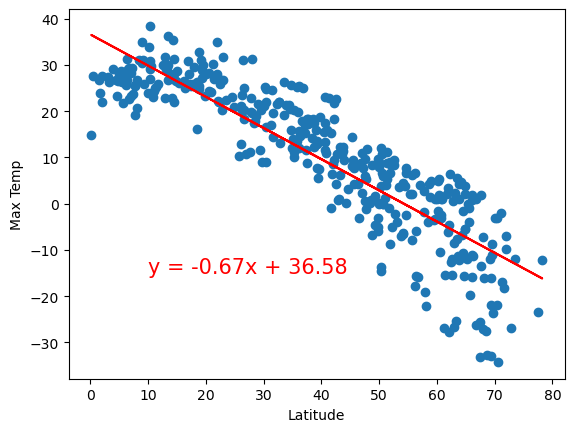

In [211]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],10,-15,'Max Temp')

The r-value is: 0.6051861661517759


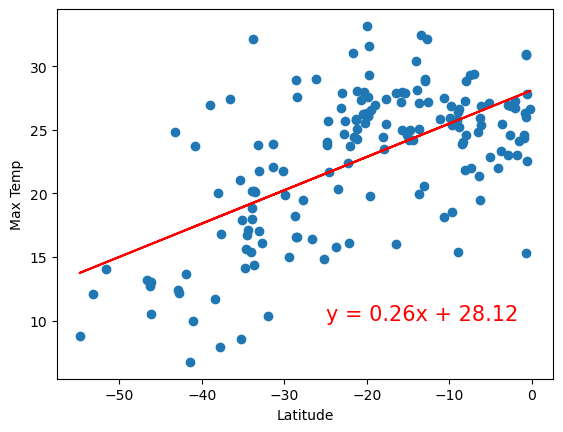

In [213]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],-25,10,'Max Temp')

**Discussion about the linear relationship:** As the latitude in the Northern Hemisphere increases, there is a steady decline of temperatures with very few outliers. In the Southern Hemisphere, as latitude increases, the temperature also increases but not as predicably as in the Northern Hemisphere. The correlation with latitude and temperature is not as clearly defined in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3171357468797835


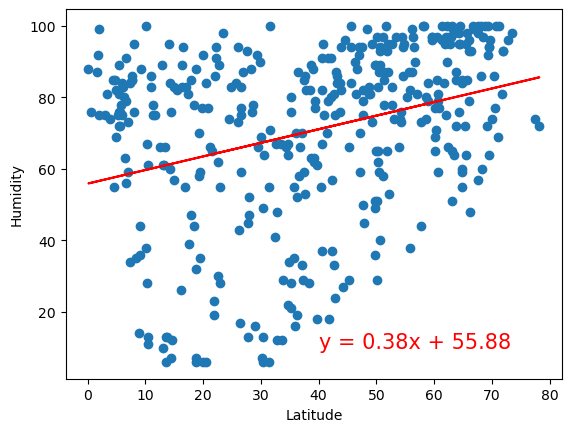

In [214]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],40,10,'Humidity')

The r-value is: 0.2931507503947270


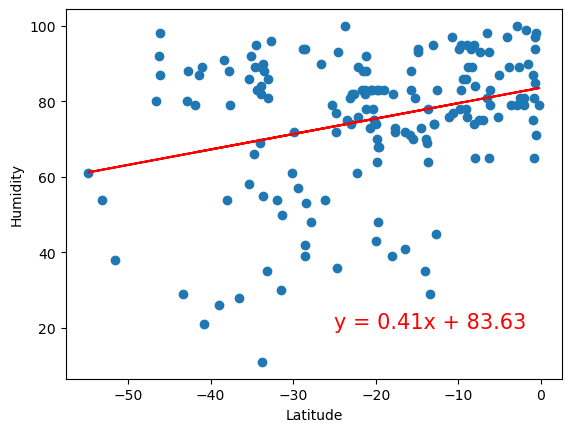

In [215]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],-25,20,'Humidity')

**Discussion about the linear relationship:** The correlation between humidity and distance from the equator are similiar in both the Northern and Southern Hemispheres. The humidity in the Northern Hemisphere appears to have little impact regardless of the distance from the equator. The Southern Hemisphere seems to have less humidity the further you move from the equator but the number of repsresented cities is considerably less in our sampling of Southern Hemisphere cities. A secondary sample may be required to test this theory.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1441044712005080


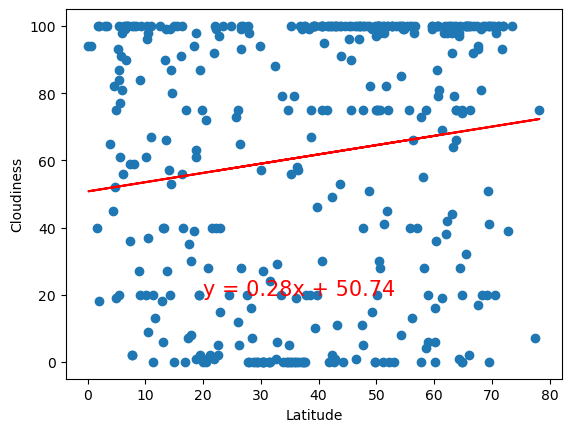

In [220]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],20,20,'Cloudiness')

The r-value is: 0.3984485578586057


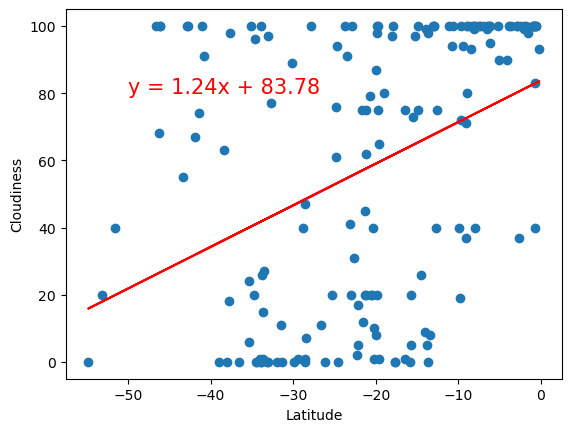

In [221]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],-50,80,'Cloudiness')

**Discussion about the linear relationship:** In the Northern Hemisphere, the distance to the equator appears to have little impact on the cloudiness of a city. Conversely, in the Southern Hemisphere, it appears that the closer the city is to the equator, the more cloudiness it experiences.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1508525167576771


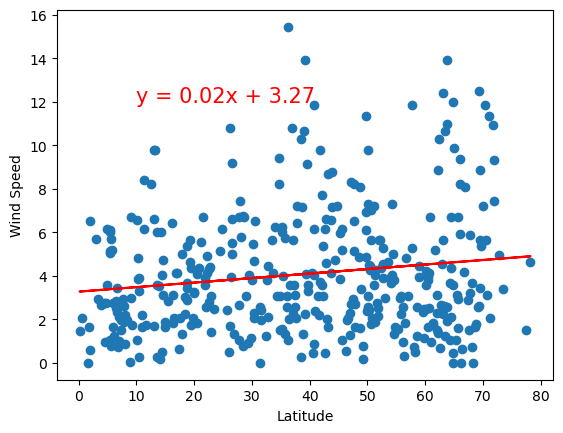

In [218]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],10,12,'Wind Speed')

The r-value is: -0.4464624950297507


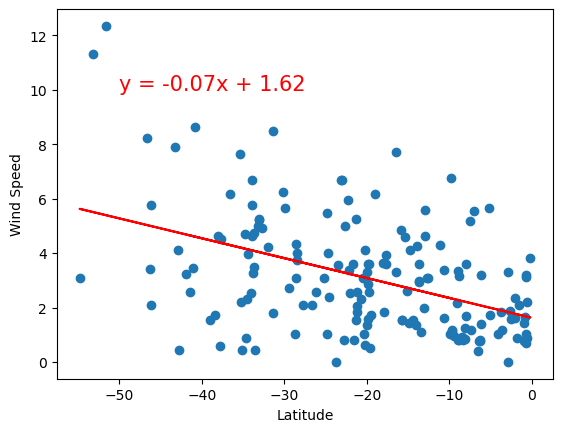

In [219]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],-50,10,'Wind Speed')

**Discussion about the linear relationship:** The wind speed in the Northern Hemisphere is fairly steady regardless of distance from the equator. The wind speed is fairly mild regardless of location in the Northern Hemisphere. In the Southern Hemisphere, wind speed appears to correlate directly with distance from the equator, as in the speed is reduced substantially the closer the city location is to the equator. 